# Product Review Analysis

# Setup and Basic Data Info

In [ ]:
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv(
    "https://drive.google.com/uc?id=1xsO2dptvUWqyrbrKb-EffRBePhHbjko1",
    encoding="latin-1"
)

In [ ]:
df.head()

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,1,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...
1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
2,3,Paket rapi...mantap....cepat....sampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
3,4,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...
4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...


In [ ]:
df.columns

Index(['Unnamed: 0', 'text', 'rating', 'category', 'product_name',
       'product_id', 'sold', 'shop_id', 'product_url'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40607 entries, 0 to 40606
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    40607 non-null  int64 
 1   text          40607 non-null  object
 2   rating        40607 non-null  int64 
 3   category      40607 non-null  object
 4   product_name  40607 non-null  object
 5   product_id    40607 non-null  int64 
 6   sold          40593 non-null  object
 7   shop_id       40607 non-null  int64 
 8   product_url   40607 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.8+ MB


In [ ]:
instances, features = df.shape

print("Instances: "+str(instances)+", Features: "+str(features))

Instances: 40607, Features: 9


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
text,object
rating,int64
category,object
product_name,object
product_id,int64
sold,object
shop_id,int64
product_url,object


In [ ]:
df.nunique()

,0
Unnamed: 0,40607
text,37301
rating,5
category,5
product_name,3647
product_id,3664
sold,305
shop_id,158
product_url,3664


In [ ]:
df.describe()

,Unnamed: 0,rating,product_id,shop_id
count,40607.000000,40607.000000,4.060700e+04,4.060700e+04
mean,20443.690103,4.642574,1.985060e+08,1.342409e+06
std,11810.534919,0.732448,1.284990e+08,1.028990e+06
min,1.000000,1.000000,1.505048e+06,1.563000e+03
25%,10225.500000,4.000000,1.052222e+08,1.625610e+05
50%,20427.000000,5.000000,1.829377e+08,1.787060e+06
75%,30680.500000,5.000000,2.889640e+08,2.048686e+06
max,40893.000000,5.000000,5.028693e+08,5.359950e+06


# Check Missing Value

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
text,0
rating,0
category,0
product_name,0
product_id,0
sold,14
shop_id,0
product_url,0


# Data Cleaning

In [ ]:
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        text = text.strip().lower()
    return text

def clean_sold(sold_value):
    if isinstance(sold_value, str):
        sold_value = sold_value.strip().lower()
        sold_value = sold_value.replace(',', '.')
        if 'rb' in sold_value or 'k' in sold_value:
            num_str = re.sub(r'[^\d.]', '', sold_value)
            try:
                return float(num_str) * 1000
            except:
                return 0
        elif 'jt' in sold_value or 'm' in sold_value:
            num_str = re.sub(r'[^\d.]', '', sold_value)
            try:
                return float(num_str) * 1000000
            except:
                return 0
        else:
            try:
                return float(sold_value)
            except:
                return 0
    else:
        return sold_value

df['text_clean'] = df['text'].apply(clean_text)
df.fillna({'text': '', 'rating': 0}, inplace=True)
df.fillna({'sold': '', 'sold': 0}, inplace=True)

df['sold'] = df['sold'].apply(clean_sold)
df['sold'] = pd.to_numeric(df['sold'], errors='coerce').fillna(0).astype(int)

print("Contoh sebelum cleaning:", df['text'].iloc[2])
print("Contoh setelah cleaning:", df['text_clean'].iloc[2])

Contoh sebelum cleaning: Paket rapi...mantap....cepat....sampe ke tujuan
Contoh setelah cleaning: paket rapi mantap cepat sampe ke tujuan


# EDA (Exploratory Data Analysis)

## Analisis Variabel Target (Rating)

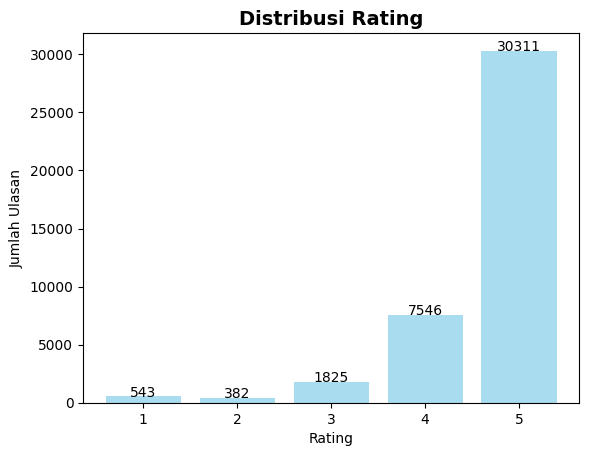

In [ ]:
rating_counts = df['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', alpha=0.7)
plt.title('Distribusi Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Jumlah Ulasan')
for i, v in enumerate(rating_counts.values):
    plt.text(rating_counts.index[i], v + 0.1, str(v), ha='center')

Text(0.5, 0, 'Rata-rata Rating')

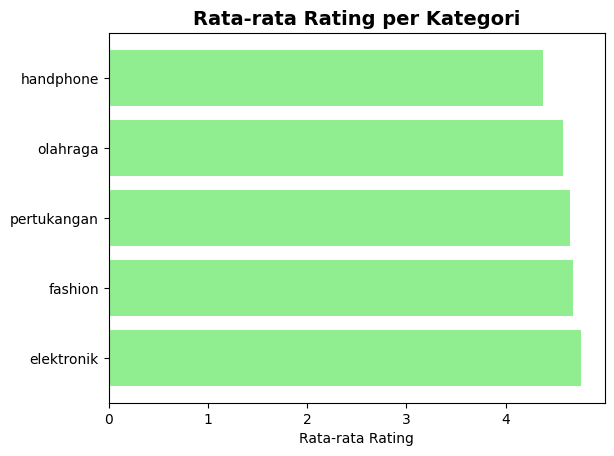

In [ ]:
category_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
plt.barh(range(len(category_rating)), category_rating.values, color='lightgreen')
plt.yticks(range(len(category_rating)), category_rating.index)
plt.title('Rata-rata Rating per Kategori', fontsize=14, fontweight='bold')
plt.xlabel('Rata-rata Rating')

Text(0.5, 1.0, 'Word Cloud - Ulasan Positif')

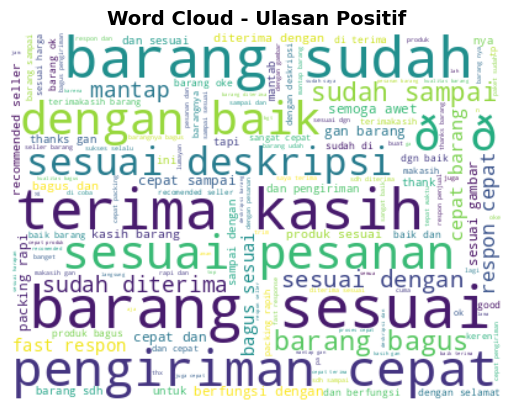

In [ ]:
positive_reviews = ' '.join(df[df['rating'] >= 4]['text_clean'])
wordcloud = WordCloud(width=400, height=300, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ulasan Positif', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Word Cloud - Ulasan Negatif')

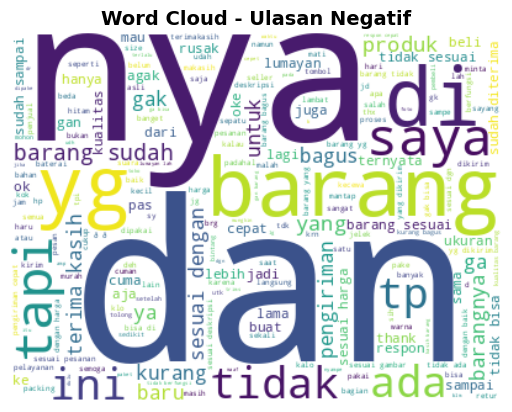

In [ ]:
negative_reviews = ' '.join(df[df['rating'] <= 3]['text_clean'])
wordcloud = WordCloud(width=400, height=300, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ulasan Negatif', fontsize=14, fontweight='bold')

In [ ]:
print("\n📊 Statistik Rating:")
print(f"Rata-rata Rating: {df['rating'].mean():.2f}")
print(f"Median Rating: {df['rating'].median()}")
print(f"Modus Rating: {df['rating'].mode()[0]}")
print(f"Rating Terendah: {df['rating'].min()}")
print(f"Rating Tertinggi: {df['rating'].max()}")


📊 Statistik Rating:
Rata-rata Rating: 4.64
Median Rating: 5.0
Modus Rating: 5
Rating Terendah: 1
Rating Tertinggi: 5


## Analisis Univariat

Text(0, 0.5, 'Jumlah Produk')

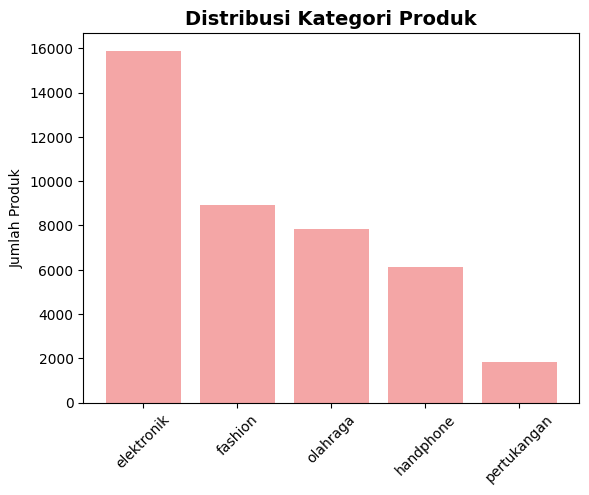

In [ ]:
category_counts = df['category'].value_counts()
plt.bar(category_counts.index, category_counts.values, color='lightcoral', alpha=0.7)
plt.title('Distribusi Kategori Produk', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Produk')


Text(0, 0.5, 'Frekuensi')

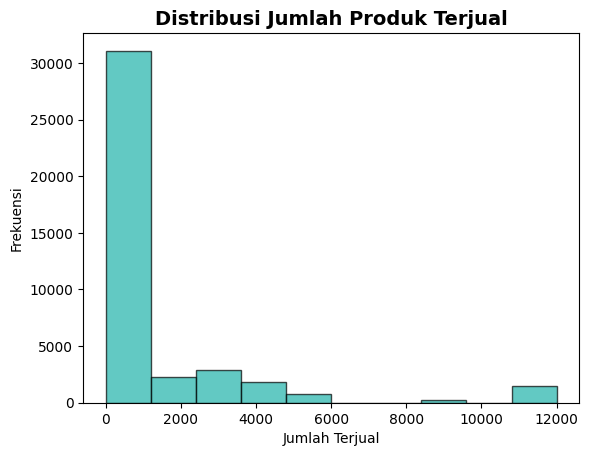

In [ ]:
plt.hist(df['sold'], bins=10, color='lightseagreen', alpha=0.7, edgecolor='black')
plt.title('Distribusi Jumlah Produk Terjual', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Frekuensi')

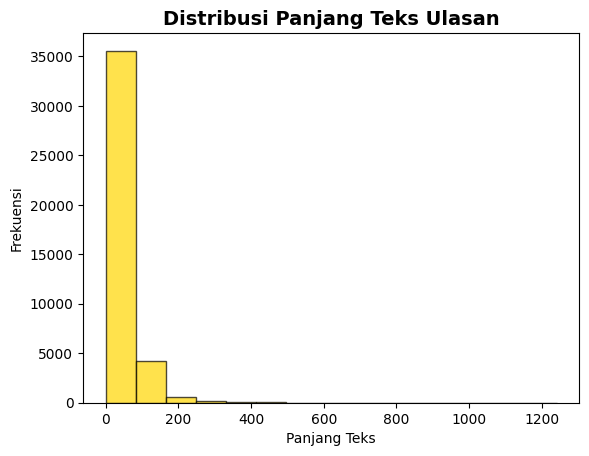

In [ ]:
df['text_length'] = df['text_clean'].str.len()
plt.hist(df['text_length'], bins=15, color='gold', alpha=0.7, edgecolor='black')
plt.title('Distribusi Panjang Teks Ulasan', fontsize=14, fontweight='bold')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Frekuensi')

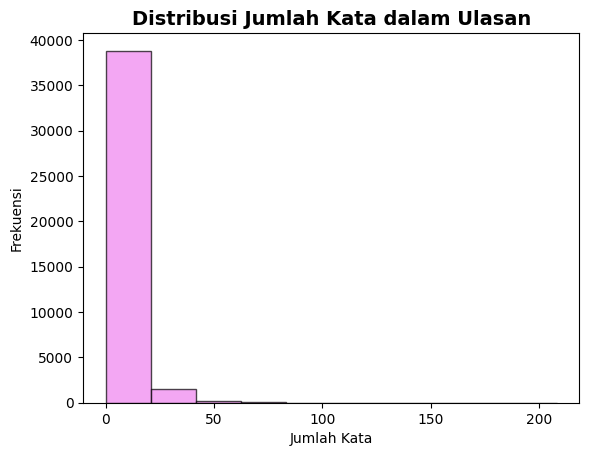

In [ ]:
df['word_count'] = df['text_clean'].str.split().str.len()
plt.hist(df['word_count'], bins=10, color='violet', alpha=0.7, edgecolor='black')
plt.title('Distribusi Jumlah Kata dalam Ulasan', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')


In [ ]:
print(df[['rating', 'sold', 'text_length', 'word_count']].describe())

             rating          sold   text_length    word_count
count  40607.000000  40607.000000  40607.000000  40607.000000
mean       4.642574   1247.556579     51.387618      8.113675
std        0.732448   2468.291996     43.387021      7.286347
min        1.000000      0.000000      0.000000      0.000000
25%        4.000000     45.000000     29.000000      4.000000
50%        5.000000    183.000000     40.000000      6.000000
75%        5.000000   1000.000000     59.000000      9.000000
max        5.000000  12000.000000   1241.000000    208.000000


## Analsis Bivariat/Multivariat

Text(0, 0.5, 'Jumlah Terjual')

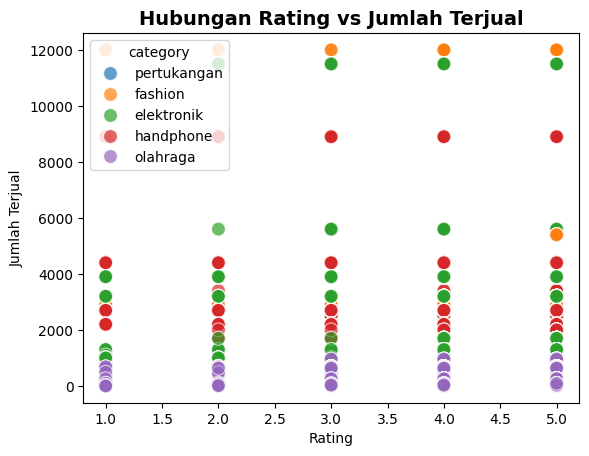

In [ ]:
sns.scatterplot(data=df, x='rating', y='sold', hue='category', s=100, alpha=0.7)
plt.title('Hubungan Rating vs Jumlah Terjual', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Jumlah Terjual')

Text(0, 0.5, 'Panjang Teks')

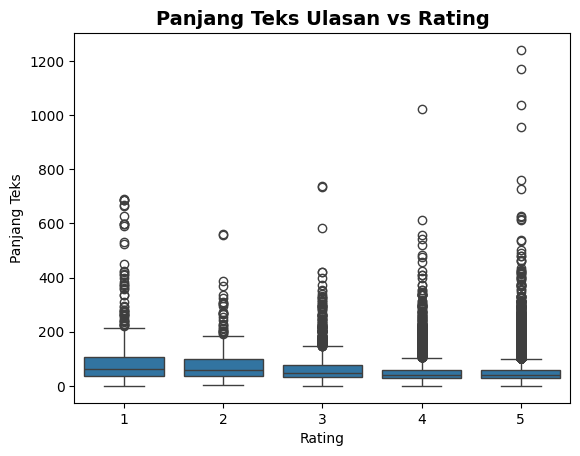

In [ ]:
sns.boxplot(data=df, x='rating', y='text_length')
plt.title('Panjang Teks Ulasan vs Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Panjang Teks')

Text(0.5, 1.0, 'Heatmap Korelasi Numerik')

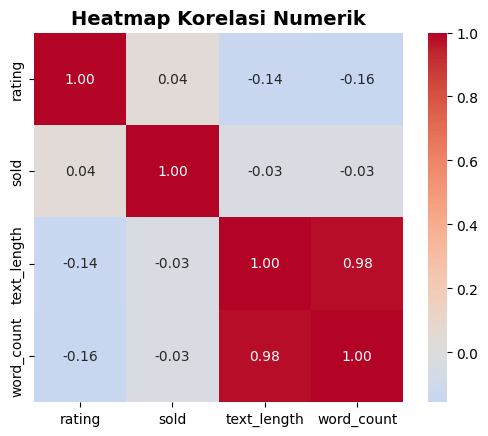

In [ ]:
numeric_cols = ['rating', 'sold', 'text_length', 'word_count']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Heatmap Korelasi Numerik', fontsize=14, fontweight='bold')

Text(0.5, 0, 'Rata-rata Jumlah Terjual')

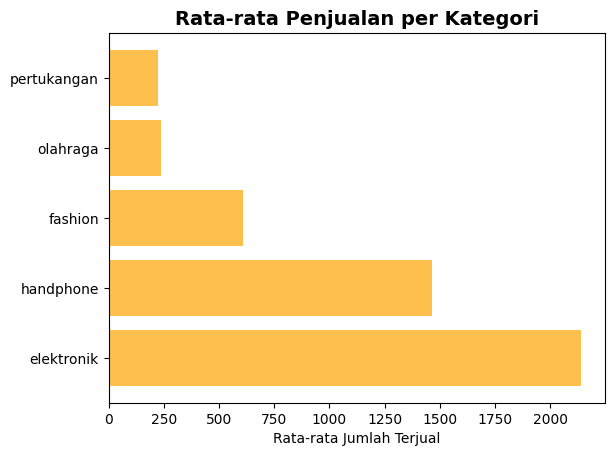

In [ ]:
category_sales = df.groupby('category')['sold'].mean().sort_values(ascending=False)
plt.barh(range(len(category_sales)), category_sales.values, color='orange', alpha=0.7)
plt.yticks(range(len(category_sales)), category_sales.index)
plt.title('Rata-rata Penjualan per Kategori', fontsize=14, fontweight='bold')
plt.xlabel('Rata-rata Jumlah Terjual')